In [1]:
#preprocessing images
import tensorflow as tf
from tensorflow.keras import layers, models,preprocessing,regularizers,callbacks
from matplotlib import pyplot as plt



In [2]:
datagen = preprocessing.image.ImageDataGenerator(rescale=1/255)# normalisation
train_generator = datagen.flow_from_directory(
        'datasets/final_image_data/train',
        batch_size=10,
        target_size=(512,512),
        class_mode='binary')
val_generator = datagen.flow_from_directory(
        'datasets/final_image_data/test',
        color_mode='rgb',
        target_size=(512,512),
        class_mode='binary')


Found 64 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [3]:
# model
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((4, 4), strides=4))
model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((1, 3), strides=(1,3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='linear',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.8))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy',
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.keras.metrics.FalsePositives()])

Epoch 1/50


C:\Users\mansi\AppData\Local\Temp/ipykernel_8808/1896593364.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=50,validation_data=val_generator,shuffle=True,


7/7 [==============================] - 9s 1s/step - loss: 2.8589 - accuracy: 0.8281 - true_negatives: 27.0000 - true_positives: 26.0000 - false_negatives: 6.0000 - false_positives: 5.0000 - val_loss: 3.1839 - val_accuracy: 0.6000 - val_true_negatives: 6.0000 - val_true_positives: 6.0000 - val_false_negatives: 4.0000 - val_false_positives: 4.0000
Epoch 2/50
7/7 [==============================] - 8s 1s/step - loss: 2.9780 - accuracy: 0.8281 - true_negatives: 28.0000 - true_positives: 25.0000 - false_negatives: 7.0000 - false_positives: 4.0000 - val_loss: 3.1729 - val_accuracy: 0.6000 - val_true_negatives: 5.0000 - val_true_positives: 7.0000 - val_false_negatives: 3.0000 - val_false_positives: 5.0000
Epoch 3/50
7/7 [==============================] - 8s 1s/step - loss: 2.8664 - accuracy: 0.8281 - true_negatives: 23.0000 - true_positives: 30.0000 - false_negatives: 2.0000 - false_positives: 9.0000 - val_loss: 3.2132 - val_accuracy: 0.6000 - val_true_negatives: 8.0000 - val_true_positives: 4

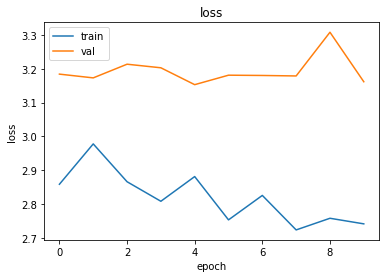

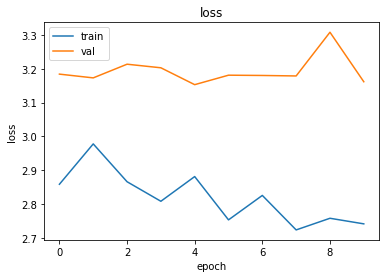

In [5]:
# fitiing
history=model.fit_generator(train_generator,epochs=50,validation_data=val_generator,shuffle=True,
                            callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)])
# using early stopping method to train the model to achieve maximum accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [6]:
#testing 
loss,accuracy,tn,tp,fn,fp=model.evaluate_generator(val_generator)
print(accuracy,tn,tp,fn,fp)

C:\Users\mansi\AppData\Local\Temp/ipykernel_8808/1985064804.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss,accuracy,tn,tp,fn,fp=model.evaluate_generator(val_generator)


0.6499999761581421 5.0 8.0 2.0 5.0


In [9]:
loss,accuracy,tn,tp,fn,fp = model.evaluate(train_generator)

7/7 [==============================] - 2s 284ms/step - loss: 2.7475 - accuracy: 0.9844 - true_negatives: 31.0000 - true_positives: 32.0000 - false_negatives: 0.0000e+00 - false_positives: 1.0000


In [10]:
print(accuracy,tn,tp,fn,fp)

0.984375 31.0 32.0 0.0 1.0
